In [1]:
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [2]:
names = ['alice', 'bob', 'john', 'mary', 'david', 'sarah', 'mike', 'emma', 'daniel', 'sophia']
subjects = ['math', 'english', 'science']

data = []

for i in range(120):
    data.append({
            'student': random.choice(names),
            'math': random.randint(40, 100),
            'english': random.randint(40, 100),
            'science': random.randint(40, 100)
    })


df = pd.DataFrame(data)

df.to_csv('new_student_file.csv', index = False)

df

,student,math,english,science
0,bob,74,89,49
1,emma,97,48,55
2,emma,43,84,73
3,mary,77,93,61
4,sophia,69,68,78
...,...,...,...,...
115,john,94,87,70
116,sophia,49,79,95
117,john,79,47,92
118,mike,87,50,86


In [3]:
df.head()

,student,math,english,science
0,bob,74,89,49
1,emma,97,48,55
2,emma,43,84,73
3,mary,77,93,61
4,sophia,69,68,78


In [4]:
# calculate the top scorer in the class

df['total_score'] = df.apply([lambda row : row['math'] + row['english'] + row['science']], axis = 1)
df.head()

,student,math,english,science,total_score
0,bob,74,89,49,212
1,emma,97,48,55,200
2,emma,43,84,73,200
3,mary,77,93,61,231
4,sophia,69,68,78,215


In [5]:
# calcularte the average of each student in the class

df['avg_score'] = df[['math', 'english', 'science']].mean(axis = 1).round(1)
df.head()

,student,math,english,science,total_score,avg_score
0,bob,74,89,49,212,70.7
1,emma,97,48,55,200,66.7
2,emma,43,84,73,200,66.7
3,mary,77,93,61,231,77.0
4,sophia,69,68,78,215,71.7


In [6]:
# performance category for each students

def grade(avg):
    if avg >= 75:
        return 'excellent'
    elif avg >= 65:
        return 'good'
    else:
        'need imporovement'

df['performance'] = df['avg_score'].apply(grade)

df

,student,math,english,science,total_score,avg_score,performance
0,bob,74,89,49,212,70.7,good
1,emma,97,48,55,200,66.7,good
2,emma,43,84,73,200,66.7,good
3,mary,77,93,61,231,77.0,excellent
4,sophia,69,68,78,215,71.7,good
...,...,...,...,...,...,...,...
115,john,94,87,70,251,83.7,excellent
116,sophia,49,79,95,223,74.3,good
117,john,79,47,92,218,72.7,good
118,mike,87,50,86,223,74.3,good


In [29]:
# average score of students per subject

df[['math', 'english', 'science']].mean()

math       67.825000
english    70.566667
science    68.741667
dtype: float64

In [32]:
# number of students by performance

df['performance'].value_counts()

performance
good         39
excellent    37
Name: count, dtype: int64

In [37]:
# to get best students based on total score across the 3 subjects

df.sort_values('total_score', ascending = False).head()

,student,math,english,science,total_score,avg_score,performance
91,bob,99,93,94,286,95.3,excellent
74,mike,92,98,94,284,94.7,excellent
111,mike,100,97,87,284,94.7,excellent
41,sarah,97,100,76,273,91.0,excellent
89,alice,81,92,96,269,89.7,excellent


<Axes: title={'center': 'student performance ditribution'}, xlabel='performance'>

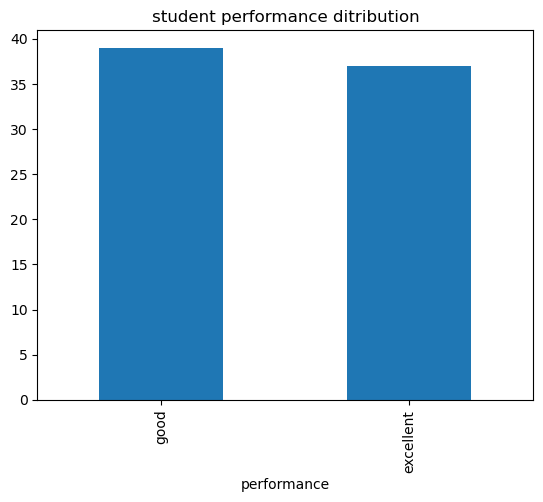

In [41]:
df['performance'].value_counts().plot(
    kind = 'bar',
    title = 'student performance ditribution'
)

In [43]:
df['student'].value_counts().sum()

np.int64(120)

In [44]:
len(df)

120

In [45]:
df['performance'].value_counts().sum()

np.int64(76)

In [47]:
df['performance'].isna().sum()

np.int64(44)

In [51]:
# because of the discrepancies in the performance counts, i recalculated the average score again

df['average_score'] = df[['math', 'english', 'science']].mean(axis = 1).round(1)
df

,student,math,english,science,total_score,avg_score,performance,average_score
0,daniel,92,86,47,225,75.0,excellent,75.0
1,sophia,90,47,81,218,72.7,good,72.7
2,bob,89,64,78,231,77.0,excellent,77.0
3,sophia,83,99,46,228,76.0,excellent,76.0
4,alice,89,61,42,192,64.0,None,64.0
...,...,...,...,...,...,...,...,...
115,sarah,100,59,92,251,83.7,excellent,83.7
116,david,48,75,57,180,60.0,None,60.0
117,alice,81,62,66,209,69.7,good,69.7
118,sophia,82,84,58,224,74.7,good,74.7


In [55]:
def grade_sc(average):
    if average >= 75:
        return 'excellent'
    elif average >= 60:
        return 'good'
    else:
        'need improvement'

df['performance_score'] = df['average_score'].apply(grade_sc)
df

,student,math,english,science,total_score,avg_score,performance,average_score,performnace_score,performance_score
0,daniel,92,86,47,225,75.0,excellent,75.0,excellent,excellent
1,sophia,90,47,81,218,72.7,good,72.7,good,good
2,bob,89,64,78,231,77.0,excellent,77.0,excellent,excellent
3,sophia,83,99,46,228,76.0,excellent,76.0,excellent,excellent
4,alice,89,61,42,192,64.0,None,64.0,good,good
...,...,...,...,...,...,...,...,...,...,...
115,sarah,100,59,92,251,83.7,excellent,83.7,excellent,excellent
116,david,48,75,57,180,60.0,None,60.0,good,good
117,alice,81,62,66,209,69.7,good,69.7,good,good
118,sophia,82,84,58,224,74.7,good,74.7,good,good


In [58]:
df['performance_score'].value_counts().sum()

np.int64(95)

In [57]:
df['performance'].isna().sum()

np.int64(44)

In [59]:
len(df)

120

In [61]:
df[].fillna('average_score',)

,student,math,english,science,total_score,avg_score,performance,average_score,performnace_score,performance_score
0,daniel,92,86,47,225,75.0,excellent,75.0,excellent,excellent
1,sophia,90,47,81,218,72.7,good,72.7,good,good
2,bob,89,64,78,231,77.0,excellent,77.0,excellent,excellent
3,sophia,83,99,46,228,76.0,excellent,76.0,excellent,excellent
4,alice,89,61,42,192,64.0,average_score,64.0,good,good
...,...,...,...,...,...,...,...,...,...,...
115,sarah,100,59,92,251,83.7,excellent,83.7,excellent,excellent
116,david,48,75,57,180,60.0,average_score,60.0,good,good
117,alice,81,62,66,209,69.7,good,69.7,good,good
118,sophia,82,84,58,224,74.7,good,74.7,good,good
